# Kiểm tra và tiền xử lý bộ dữ liệu khách sạn

Notebook này phân tích bộ dữ liệu khách sạn để đánh giá chất lượng và xác định nhu cầu tiền xử lý.

## 1. Nhập các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Đọc dữ liệu

In [2]:
# Đọc file CSV
df = pd.read_csv('./data/hotel_bookings.csv')

# Hiển thị 5 dòng đầu tiên
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 3. Tổng quan về dữ liệu

In [3]:
# Kiểm tra kích thước dữ liệu
print(f"Kích thước dữ liệu: {df.shape}")

# Kiểm tra các cột trong dữ liệu
print(f"Các cột trong dữ liệu: {df.columns.tolist()}")

# Thông tin về dữ liệu
df.info()

Kích thước dữ liệu: (119390, 32)
Các cột trong dữ liệu: ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled            

In [4]:
# Thống kê mô tả dữ liệu
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
# Kiểm tra dữ liệu rỗng
null_values = df.isnull().sum()
missing_data = pd.DataFrame({'Số lượng giá trị null': null_values,
                           'Phần trăm': 100 * null_values / len(df)})
print("Thông tin giá trị null:")
missing_data.sort_values('Số lượng giá trị null', ascending=False)

Thông tin giá trị null:


,Số lượng giá trị null,Phần trăm
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
hotel,0,0.000000
is_canceled,0,0.000000
stays_in_weekend_nights,0,0.000000
arrival_date_day_of_month,0,0.000000


In [6]:
# Kiểm tra giá trị 'NULL' dạng chuỗi trong dữ liệu
string_null_counts = {}
for col in df.columns:
    string_null_count = (df[col] == 'NULL').sum() if df[col].dtype == 'object' else 0
    if string_null_count > 0:
        string_null_counts[col] = string_null_count

pd.Series(string_null_counts).sort_values(ascending=False)

Series([], dtype: object)

## 4. Kiểm tra dữ liệu trùng lặp

In [7]:
# Đếm số lượng dòng trùng lặp
duplicates = df.duplicated().sum()
print(f"Số lượng dòng trùng lặp: {duplicates}")
print(f"Tỷ lệ trùng lặp: {duplicates/len(df):.4f}")

Số lượng dòng trùng lặp: 31994
Tỷ lệ trùng lặp: 0.2680


## 5. Phân tích giá trị bất thường

In [8]:
# Kiểm tra giá trị âm trong cột số
# Lấy danh sách tất cả các cột có kiểu dữ liệu số (int64 và float64).
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns 
# Duyệt qua từng cột trong danh sách và đếm số lượng giá trị âm.
for col in numerical_cols:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"Cột '{col}' có {neg_count} giá trị âm")

Cột 'adr' có 1 giá trị âm


## 6. Kiểm tra giá trị duy nhất trong cột categorical

In [9]:
# Kiểm tra giá trị duy nhất và phân phối của các cột categorical
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_values = df[col].nunique()
    print(f"\nCột '{col}' có {unique_values} giá trị duy nhất:")
    print(df[col].value_counts().head(10))


Cột 'hotel' có 2 giá trị duy nhất:
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

Cột 'arrival_date_month' có 12 giá trị duy nhất:
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
Name: count, dtype: int64

Cột 'meal' có 5 giá trị duy nhất:
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

Cột 'country' có 177 giá trị duy nhất:
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

Cột 'market_segment' có 8 giá trị duy nhất:
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined        

## 7. Kiểm tra tính nhất quán của dữ liệu

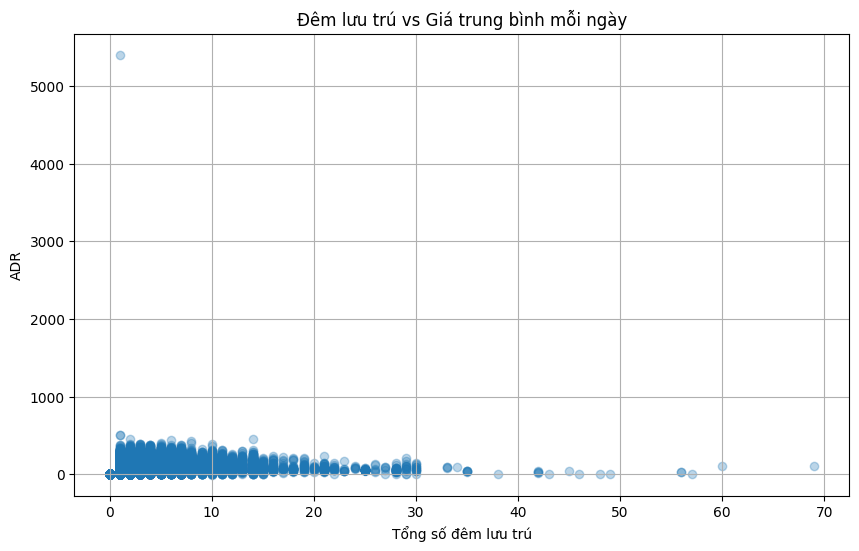

Số dòng có tổng số đêm lưu trú > 0 mà ADR = 0: 1244


In [10]:
# Kiểm tra tính nhất quán giữa các cột có liên quan
# Ví dụ: số đêm lưu trú so với adr (average daily rate)
plt.figure(figsize=(10, 6))
total_nights = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
plt.scatter(total_nights, df['adr'], alpha=0.3)
plt.title('Đêm lưu trú vs Giá trung bình mỗi ngày')
plt.xlabel('Tổng số đêm lưu trú')
plt.ylabel('ADR')
plt.grid(True)
plt.show()
# Đếm số lượng dòng có total_nights > 0 mà adr = 0
invalid_adr_count = df[(total_nights > 0) & (df['adr'] == 0)].shape[0]
print(f"Số dòng có tổng số đêm lưu trú > 0 mà ADR = 0: {invalid_adr_count}")


Xuất hiện các giá trị bất thường. adr = 0 trong khi total_nights lớn hơn 0

In [11]:
# Kiểm tra mối quan hệ giữa arrival_date_year, arrival_date_month, và arrival_date_day_of_month
print("Kiểm tra tính nhất quán của ngày tháng:")
date_consistency = df.groupby(['arrival_date_year', 'arrival_date_month'])['arrival_date_day_of_month'].agg(['min', 'max'])
date_consistency

Kiểm tra tính nhất quán của ngày tháng:


min  max
arrival_date_year arrival_date_month          
2015              August                1   31
                  December              1   31
                  July                  1   31
                  November              1   30
                  October               1   31
                  September             1   30
2016              April                 1   30
                  August                1   31
                  December              1   31
                  February              1   29
                  January               1   31
                  July                  1   31
                  June                  1   30
                  March                 1   31
                  May                   1   31
                  November              1   30
                  October               1   31
                  September             1   30
2017              April                 1   30
                  August                1   31
                  February              1   28
                  January               1   31
                  July                  1   31
                  June                  1   30
                  March                 1   31
                  May                   1   31

Không có giá trị ngày tháng bất thường

## 8. Kết luận và tiền xử lý
Dựa trên phân tích trên, có thể đưa ra một số kết luận và tiền xử lý như sau:

1. **Xử lý giá trị NULL, Undefined:**
   - Cột *company* và *agent* điền giá trị đại diện là 0.
   - Cột *country* điền giá trị phổ biến nhất.
   - Cột *children* điền giá trị 0.
   - Cột *market_segment* và *distribution_channel* chỉ có vài dòng Undefined nên loại bỏ.

2. **Dữ liệu trùng lặp:**
   - Loại bỏ các dòng trùng lặp nếu có.

3. **Feature Engineering:**
   - Tạo cột mới có ý nghĩa (tổng số đêm lưu trú).
   
4. **Giá trị bất thường:**
   - Loại bỏ các dòng giá trị *adr* bé hơn 0 hoặc bằng 0 khi *total_night* lớn hơn 0

5. **Chuẩn hóa dữ liệu:**
   - Chuyển đổi cột tháng từ chữ sang số. 
   
6. **Tính nhất quán:**
   - Kết hợp các cột ngày tháng năm thành một cột datetime duy nhất

Sau khi thực hiện các bước tiền xử lý, dữ liệu sẽ sẵn sàng cho phân tích và mô hình hóa tiếp theo.

In [12]:
# Tiền xử lý dữ liệu cơ bản
df_clean = df.copy()

# 1. Xử lý NULL và Undefined
# Cột *company* và *agent* điền giá trị đại diện là 0.
df_clean['company'] = df_clean['company'].fillna(0)
df_clean['agent'] = df_clean['agent'].fillna(0)

# Cột *country* điền giá trị phổ biến nhất.
df_clean['country'] = df_clean['country'].fillna(df_clean['country'].mode()[0])

# Cột *children* điền giá trị 0.
df_clean['children'] = df_clean['children'].fillna(0)

# Loại bỏ các dòng Undefined trong cột *market_segment* và *distribution_channel*
df_clean = df_clean[~df_clean['market_segment'].isin(['Undefined'])]
df_clean = df_clean[~df_clean['distribution_channel'].isin(['Undefined'])]

# 2.Loại bỏ dữ liệu trùng lặp
df_clean = df_clean.drop_duplicates()

# 3. Feature Engineering: Tạo cột total_nights
df_clean['total_nights'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']

# 4. Loại bỏ các dòng có giá trị *adr* âm hoặc total_nights lớn hơn 0 mà *adr* = 0
df_clean = df_clean[~((df_clean['adr'] < 0) | ((df_clean['adr'] == 0) & (df_clean['total_nights'] > 0)))]

# 5. Thêm cột đổi từ tháng chữ sang số
# Chuyển đổi tháng từ chữ sang số
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df_clean['arrival_date_month_num'] = df_clean['arrival_date_month'].map(month_map)

# 6. Tạo cột ngày tháng đầy đủ
df_clean['arrival_date'] = pd.to_datetime({
    'year': df_clean['arrival_date_year'],
    'month': df_clean['arrival_date_month_num'],
    'day': df_clean['arrival_date_day_of_month']
})


# Hiển thị thông tin sau khi tiền xử lý
print(f"Kích thước sau khi tiền xử lý: {df_clean.shape}")
df_clean.head()

Kích thước sau khi tiền xử lý: (86244, 35)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,arrival_date_month_num,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,7,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,7,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,7,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,7,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,7,2015-07-01


In [13]:
df_clean.info()

# Kiểm tra dữ liệu rỗng
null_values = df_clean.isnull().sum()
missing_data = pd.DataFrame({'Số lượng giá trị null': null_values,
                           'Phần trăm': 100 * null_values / len(df_clean)})
print("\nThông tin giá trị null:")
missing_data.sort_values('Số lượng giá trị null', ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 86244 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86244 non-null  object        
 1   is_canceled                     86244 non-null  int64         
 2   lead_time                       86244 non-null  int64         
 3   arrival_date_year               86244 non-null  int64         
 4   arrival_date_month              86244 non-null  object        
 5   arrival_date_week_number        86244 non-null  int64         
 6   arrival_date_day_of_month       86244 non-null  int64         
 7   stays_in_weekend_nights         86244 non-null  int64         
 8   stays_in_week_nights            86244 non-null  int64         
 9   adults                          86244 non-null  int64         
 10  children                        86244 non-null  float64       
 11  babies

,Số lượng giá trị null,Phần trăm
hotel,0,0.0
is_canceled,0,0.0
lead_time,0,0.0
arrival_date_year,0,0.0
arrival_date_month,0,0.0
arrival_date_week_number,0,0.0
arrival_date_day_of_month,0,0.0
stays_in_weekend_nights,0,0.0
stays_in_week_nights,0,0.0
adults,0,0.0


In [14]:
# Kiểm tra lại giá trị duy nhất xem còn Undefined không
for col in categorical_cols:
    unique_values = df_clean[col].nunique()
    print(f"\nCột '{col}' có {unique_values} giá trị duy nhất:")
    print(df_clean[col].value_counts().head(10))



Cột 'hotel' có 2 giá trị duy nhất:
hotel
City Hotel      52635
Resort Hotel    33609
Name: count, dtype: int64

Cột 'arrival_date_month' có 12 giá trị duy nhất:
arrival_date_month
August       11148
July          9957
May           8263
April         7815
June          7690
March         7429
October       6808
September     6564
February      6010
December      5021
Name: count, dtype: int64

Cột 'meal' có 5 giá trị duy nhất:
meal
BB           67091
SC            9355
HB            8986
Undefined      467
FB             345
Name: count, dtype: int64

Cột 'country' có 177 giá trị duy nhất:
country
PRT    27000
GBR    10387
FRA     8800
ESP     7199
DEU     5367
ITA     3054
IRL     3011
BEL     2077
BRA     1987
NLD     1909
Name: count, dtype: int64

Cột 'market_segment' có 7 giá trị duy nhất:
market_segment
Online TA        51560
Offline TA/TO    13748
Direct           11700
Groups            4753
Corporate         4179
Aviation           227
Complementary       77
Name: count, dtyp

In [15]:
# Kiểm tra lại giá trị trùng lặp
duplicates = df_clean.duplicated().sum()
print(f"Số lượng dòng trùng lặp sau khi tiền xử lý: {duplicates}")
print(f"Tỷ lệ trùng lặp sau khi tiền xử lý: {duplicates/len(df_clean):.4f}")

Số lượng dòng trùng lặp sau khi tiền xử lý: 0
Tỷ lệ trùng lặp sau khi tiền xử lý: 0.0000


In [16]:
# Kiểm tra lại giá trị âm trong cột adr và số lượng total_nights > 0 mà adr = 0
# Kiểm tra lại giá trị âm trong cột adr
neg_count = (df_clean['adr'] < 0).sum()
print(f"Số lượng giá trị âm trong cột 'adr': {neg_count}")
# Kiểm tra lại số lượng dòng có total_nights > 0 mà adr = 0
invalid_adr_count = df_clean[(df_clean['total_nights'] > 0) & (df_clean['adr'] == 0)].shape[0]
print(f"Số dòng có tổng số đêm lưu trú > 0 mà ADR = 0: {invalid_adr_count}")

Số lượng giá trị âm trong cột 'adr': 0
Số dòng có tổng số đêm lưu trú > 0 mà ADR = 0: 0


In [17]:
# Xuất file CSV đã được tiền xử lý
df_clean.to_csv('./data/hotel_bookings_cleaned.csv', index=False)